<a href="https://colab.research.google.com/github/cowsilver57/Project/blob/main/%EB%9E%9C%EB%94%A9%ED%81%B4%EB%9F%BD3_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/lending_club(original).csv')

# 3. 분석

## 3-1. 당연한 결과
* 도메인 지식으로 충분히 알 수 있는 결과들

### **결과 1.** 완납자에 비해 체납자의 평균 연간 소득이 적다.

-> 체납자의 평균 연간 소득이 67,283으로 완납자의 평균 연간소득보다 적다.

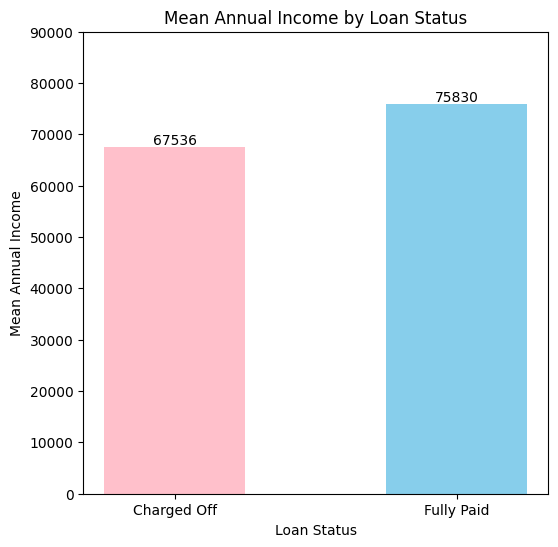

In [19]:
import matplotlib.pyplot as plt

# Calculate mean annual income for Charged Off and Fully Paid loans
charged_off_mean = data[data['loan_status'] == 'Charged Off']['annual_inc'].mean()
fully_paid_mean = data[data['loan_status'] == 'Fully Paid']['annual_inc'].mean()

# Plot
plt.figure(figsize=(6, 6))
bars = plt.bar(['Charged Off', 'Fully Paid'], [charged_off_mean, fully_paid_mean], color=['pink','skyblue'], width=0.5)
plt.xlabel('Loan Status')
plt.ylim(0, 90000)
plt.ylabel('Mean Annual Income')
plt.title('Mean Annual Income by Loan Status')

# Add annotations for mean values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height()), ha='center', va='bottom')

plt.show()

### **결과 2.** 연간 소득이 낮을 수록 체납할 확률이 높다.

-> 체납자 중 연간소득 Q1 구간에 속한 사람이 31.5%로 가장 많다.

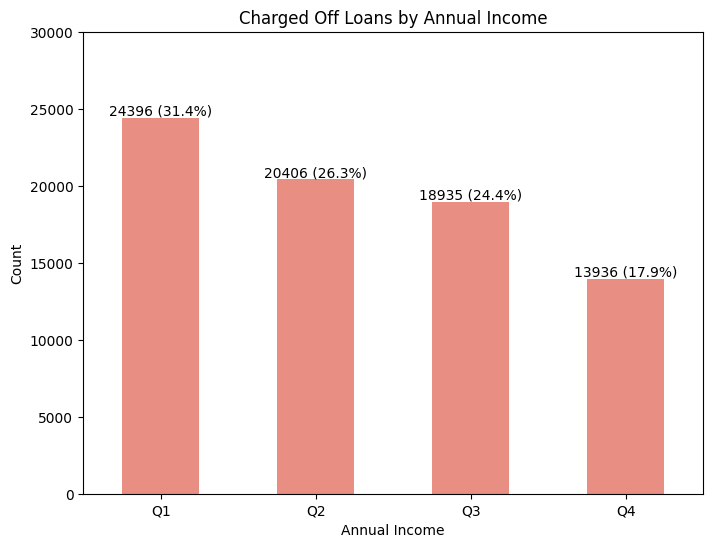

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('default')

#연간 소득 구간화
# 데이터프레임에 새로운 열 '연간 소득'을 추가
data['연간 소득'] = pd.qcut(data['annual_inc'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# 'loan_status'가 'Charged Off'인 경우만 필터링하여 그룹화하고 크기를 계산
charged_off_grouped = data[data['loan_status'] == 'Charged Off'].groupby('연간 소득').size().reset_index(name='count')

# Charged Off 대출 총합 구하기
total_charged_off = charged_off_grouped['count'].sum()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=charged_off_grouped, x='연간 소득', y='count', color='salmon', width=0.5)

# 빈도수와 비율 표시
for index, row in charged_off_grouped.iterrows():
    percentage = row['count'] / total_charged_off * 100
    plt.text(index, row['count'], f'{row["count"]} ({percentage:.1f}%)',
             color='black', ha="center", va="bottom")

plt.title('Charged Off Loans by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.ylim(0, 30000)
plt.show()

### **결과 3.** 이자율이 높을수록 체납할 확률이 높다.
-> 체납자 중 이자율 Q4 구간에 속한 사람이 41.4%로 가장 많다.

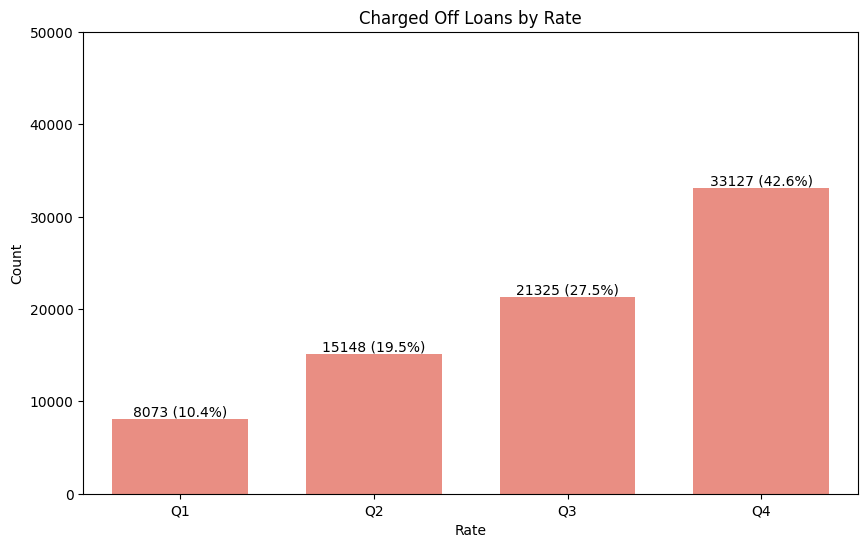

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 구간화
data['이자율'] = pd.qcut(data['int_rate'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# 'loan_status'가 'Charged Off'인 경우만 필터링하여 그룹화하고 크기를 계산
charged_off_grouped1 = data[data['loan_status'] == 'Charged Off'].groupby('이자율').size().reset_index(name='count')

# Charged Off 대출 총합 구하기
total_charged_off = charged_off_grouped1['count'].sum()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=charged_off_grouped1, x='이자율', y='count', color='salmon', width=0.7)

# 빈도수와 비율 표시
for index, row in charged_off_grouped1.iterrows():
    percentage = row['count'] / total_charged_off * 100
    plt.text(index, row['count'], f'{row["count"]} ({percentage:.1f}%)',
             color='black', ha="center", va="bottom")

plt.title('Charged Off Loans by Rate')
plt.xlabel('Rate')
plt.ylabel('Count')
plt.ylim(0, 50000)
plt.show()

## 3-2. 지역 심화 분석

### ㄱ. 지역 코드 추출

In [22]:
import re

# 우편번호 추출 함수 정의
def extract_zipcode(address):
    zipcode = re.search(r'\b\d{5}\b', address).group()
    return zipcode

# 데이터프레임에 적용하여 우편번호 추출
data['Zipcode'] = data['address'].apply(extract_zipcode)

print(data['Zipcode'])

0         22690
1         05113
2         87025
3         00813
4         11650
          ...  
396025    12951
396026    05113
396027    70466
396028    29597
396029    48052
Name: Zipcode, Length: 396030, dtype: object


In [23]:
# 주소 코드와 대출 상태로 그룹화하고 크기 계산
data['address_code'] = data['Zipcode'].str[0]
grouped = data.groupby(['address_code', 'loan_status']).size().reset_index(name='count')

### ㄴ. 지역별 체납자 및 체납률 확인
* 결과 : 1,2,3,4,7,8,9 지역만 체납률이 12-13%

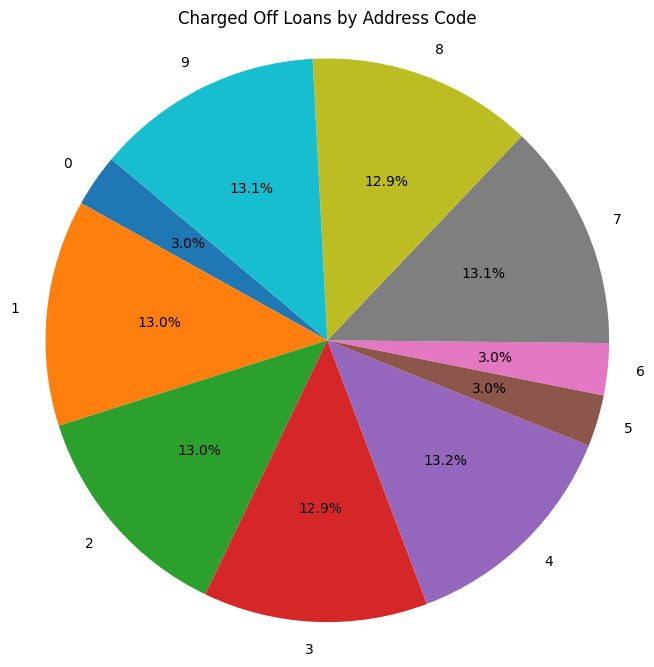

In [24]:
import matplotlib.pyplot as plt

# 체납자(Charged Off)들만 필터링
grouped = data.groupby(['address_code', 'loan_status']).size().reset_index(name='count')
charged_off_data = grouped[grouped['loan_status'] == 'Charged Off']

# 파이차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(charged_off_data['count'], labels=charged_off_data['address_code'], autopct='%1.1f%%', startangle=140)
plt.title('Charged Off Loans by Address Code')
plt.axis('equal')  # 원형으로 조정
plt.show()

### ㄷ. 체납률이 낮은 지역의 완납/체납자 비율 비교
* 결과 1: 1,8,9 지역의 인구 수는 적지만 체납자 비율이 50% 이상
* 결과 2: 1,8,9 지역에 사는 사람이면 체납자일 확률이 높다!


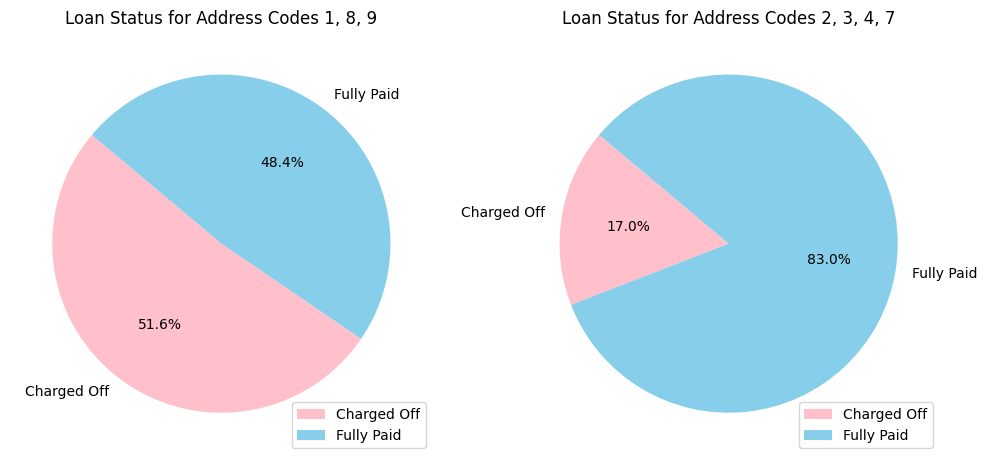

In [25]:
import matplotlib.pyplot as plt

# 주어진 데이터로부터 'address_code'가 1, 8, 9인 그룹과 그 외의 그룹을 분류하여 필터링
filtered_data = data[data['address_code'].isin(['1', '8', '9'])]
grouped_189 = filtered_data.groupby(['loan_status']).size().reset_index(name='count')

filtered_data2 = data[data['address_code'].isin(['2', '3', '4', '7'])]
grouped_others = filtered_data2.groupby(['loan_status']).size().reset_index(name='count')

# 체납 및 완납 비율을 파이 차트로 시각화
labels_189 = grouped_189['loan_status']
sizes_189 = grouped_189['count']
labels_others = grouped_others['loan_status']
sizes_others = grouped_others['count']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

colors = ['pink','skyblue']

axs[0].pie(sizes_189, labels=labels_189, autopct='%1.1f%%', startangle=140, colors=colors)
axs[0].set_title('Loan Status for Address Codes 1, 8, 9')
axs[0].legend(labels_189, loc="lower right")

axs[1].pie(sizes_others, labels=labels_others, autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title('Loan Status for Address Codes 2, 3, 4, 7')
axs[1].legend(labels_others, loc="lower right")

plt.show()

### ㄹ. 지역과 체납자를 그룹화하여 연간소득 확인
* 결과 1:1,8,9 지역의 1인당 평균 소득 확인 -> 71,000달러
* 결과 2:다른 지역은 73,000으로 1,8,9 지역이 약 2,000달러(200만원) 정도 소득이 낮다!

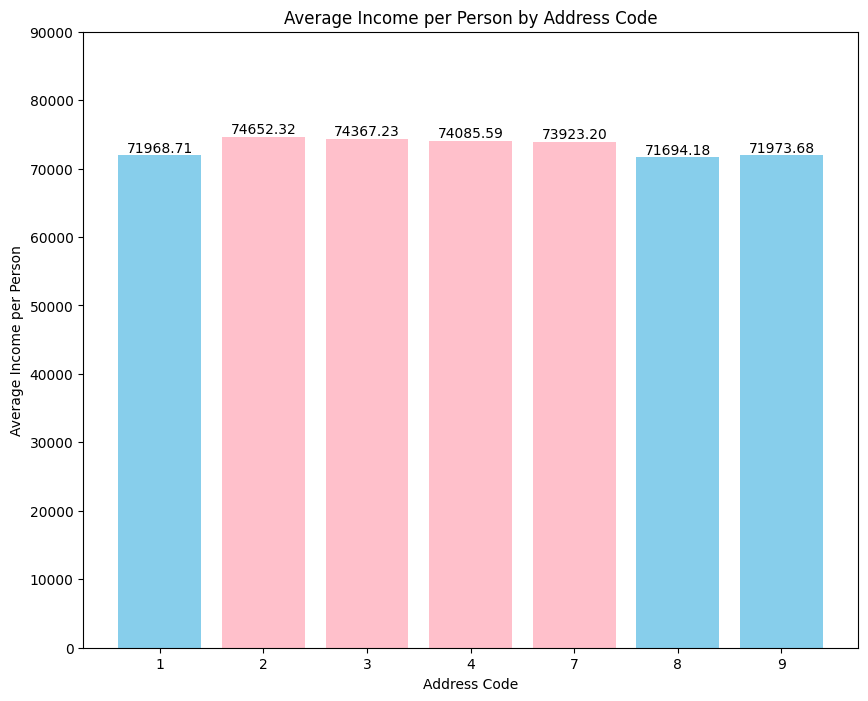

In [26]:
import matplotlib.pyplot as plt

# 주소 코드와 대출 상태로 그룹화하고 크기 계산
filtered_data = data[data['address_code'].isin(['1', '2', '3', '4', '7', '8', '9'])]
grouped = filtered_data.groupby('address_code')['annual_inc'].agg(['sum', 'size']).reset_index()
grouped['average_inc_per_person'] = grouped['sum'] / grouped['size']

# 시각화
plt.figure(figsize=(10, 8))
bars = plt.bar(grouped['address_code'], grouped['average_inc_per_person'], color=['pink' if code not in ['1', '8', '9'] else 'skyblue' for code in grouped['address_code']])
plt.title('Average Income per Person by Address Code')
plt.xlabel('Address Code')
plt.ylabel('Average Income per Person')
plt.xticks(rotation=0)
plt.ylim(0, 90000)

# 각 막대 위에 1인당 평균 소득 표시
for bar, height in zip(bars, grouped['average_inc_per_person']):
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

### ㅁ. 독립표본 T-Test 결과

In [27]:
from scipy import stats

# 두 그룹의 데이터
grouped_189 = data[(data['address_code'] == '1') | (data['address_code'] == '8') | (data['address_code'] == '9')]['annual_inc']
grouped_2347 = data[(data['address_code'] == '2') | (data['address_code'] == '3') | (data['address_code'] == '4') | (data['address_code'] == '7')]['annual_inc']

# 독립표본 T-검정 수행
t_statistic, p_value = stats.ttest_ind(grouped_189, grouped_2347)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# p-value를 이용하여 결과 출력
if p_value < 0.05:
    print("두 그룹 간의 평균 차이가 통계적으로 유의합니다.")
else:
    print("두 그룹 간의 평균 차이가 통계적으로 유의하지 않습니다.")

T-statistic: -8.89028932384087
P-value: 6.1280041182315445e-19
두 그룹 간의 평균 차이가 통계적으로 유의합니다.


### ㅂ. 지역별 & 연간소득 구간화

  index  count
0    Q1  16343
1    Q3  15065
2    Q2  14743
3    Q4  12538


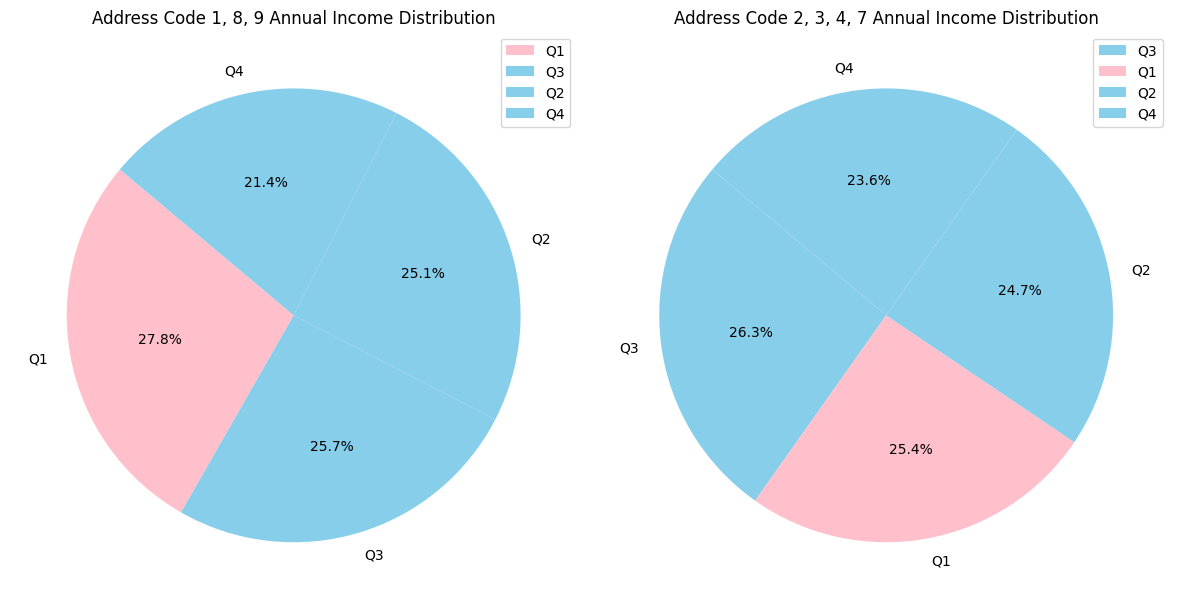

In [32]:
import matplotlib.pyplot as plt

# 데이터 예시 (filtered_data189, filtered_data2347 대신 실제 데이터를 사용)
filtered_data189 = data[(data['address_code'] == '1')|(data['address_code'] == '8')|(data['address_code'] == '9')]['연간 소득'].value_counts().reset_index(name='count')
filtered_data2347 = data[(data['address_code'] == '2')|(data['address_code'] == '3')|(data['address_code'] == '4')|(data['address_code'] == '7')]['연간 소득'].value_counts().reset_index(name='count')

print(filtered_data189)

# 그림 생성
plt.figure(figsize=(12, 6))

# 첫 번째 서브플롯
plt.subplot(1, 2, 1)
colors189 = ['pink' if i == 0 else 'skyblue' for i in range(len(filtered_data189))]
plt.pie(filtered_data189['count'], labels=filtered_data189['index'], autopct='%1.1f%%', startangle=140, colors=colors189)
plt.title('Address Code 1, 8, 9 Annual Income Distribution')
plt.legend(filtered_data189['index'], loc='upper right')

# 두 번째 서브플롯
plt.subplot(1, 2, 2)
colors2347 = ['pink' if i == 1 else 'skyblue' for i in range(len(filtered_data2347))]
plt.pie(filtered_data2347['count'], labels=filtered_data2347['index'], autopct='%1.1f%%', startangle=140, colors=colors2347)
plt.title('Address Code 2, 3, 4, 7 Annual Income Distribution')
plt.legend(filtered_data2347['index'], loc='upper right')

plt.tight_layout()
plt.show()


In [33]:
# 각 구간 값을 활용해 중간값 구하기
q1 = data['annual_inc'].quantile(0.25)
q2 = data['annual_inc'].quantile(0.5)
q3 = data['annual_inc'].quantile(0.75)
q4 = data['annual_inc'].quantile(1)

m_q1 = int(q1/2)
m_q2 = int((q1+1+q2)/2)
m_q3 = int((q2+1+q3)/2)
m_q4 = int((q3+1+q4)/2)

중간값 사용 이유
- 실제 데이터가 구간화된 명목형 변수인 경우, 각 구간의 대표값으로 중간값을 사용하는 것이 일반적
- 구간화된 명목형 변수의 경우에는 각 구간의 범위가 있고, 이 범위 내에서는 데이터가 연속적인 수치로 측정되지 않음. 따라서 각 구간의 대표값으로서 중간값을 선택하는 것은 해당 구간을 가장 잘 나타내는 선택이 될 수 있음

In [34]:
# 독립표본 T-검정
import pandas as pd
from scipy import stats

# '연간 소득' 구간화 데이터를 수치형으로 변환
income_mapping = {'Q1': m_q1, 'Q2': m_q2, 'Q3': m_q3, 'Q4':m_q4}  # 각 구간의 중간값으로 대체
data['연간 소득'] = data['연간 소득'].map(income_mapping)

# 두 그룹의 데이터 추출
group1 = data[(data['address_code'] == '1') | (data['address_code'] == '8') | (data['address_code'] == '9')]['연간 소득']
group2 = data[(data['address_code'] == '2') | (data['address_code'] == '3') | (data['address_code'] == '4') | (data['address_code'] == '7')]['연간 소득']

# 독립 표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(group1, group2)

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 0.05에서 검정
alpha = 0.05
if p_value < alpha:
    print("통계적으로 유의미한 차이가 있습니다.")
else:
    print("통계적으로 유의미한 차이가 없습니다.")

t-statistic: -11.841226391455649
p-value: 2.4298429088315953e-32
통계적으로 유의미한 차이가 있습니다.


### ㅅ. 최종 결과
1,8,9 지역의 사람들은 소득 수준이 다른 지역에 비해 낮고, 이는 높은 체납률로 연결된다.